# Evaluation Algorithms for MNIST | Multiclass Classifier
Dieses Notebook dient dazu alle Modelle miteinander zu vergleichen, dazu wurden die fertig trainierten Modelle in dem Directory ./MODEL abgelegt, hier in diesem Notebook werden die trainierten Modelle geladen und miteinander verglichen 

In [9]:
# Imports
from sklearn.externals import joblib # Laden der Modelle
from mlxtend.data import loadlocal_mnist
from sklearn.model_selection import cross_val_predict # For Predictions
from sklearn.metrics import confusion_matrix # For CM
from sklearn.model_selection import cross_val_score # For Cross Validation
from sklearn.metrics import roc_curve # Für die ROC-Kurve
from sklearn.metrics import roc_auc_score # Für die AUC
from IPython.display import HTML, display# darstellung der Ergebnisslisten
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler # Für das Skalieren von SGD
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Laden der Daten für die Predcitions
train_X, train_y = loadlocal_mnist(
        images_path='./Data/train-images.idx3-ubyte', 
        labels_path='./Data/train-labels.idx1-ubyte')
test_X, test_y = loadlocal_mnist(
        images_path='./Data/t10k-images.idx3-ubyte', 
        labels_path='./Data/t10k-labels.idx1-ubyte')

In [11]:
# hier lediglich die fertig trainierten Modelle laden
sgd_clf = joblib.load("./MODEL/MNIST_MultiClassClassifier_sgd_clf.pkl")
logReg_clf = joblib.load("./MODEL/MNIST_MultiClassClassifier_logReg_clf.pkl")
forest_clf = joblib.load("./MODEL/MNIST_MultiClassClassifier_forest_clf.pkl")

In [12]:
# Liste aller Modelle, welche wir im weiteren auswerten
trainedModels = [sgd_clf, logReg_clf, forest_clf]

# Accuracy
Bei der Accuracy misst man die Anzahl der richtig klassifizierten einheiten gegen alle 
Die Fragestellung lautet gegen was man testet
1) gegen die Testdaten
2) gegen die CV-Daten
im Weiteren arbeit ich mit cv-Daten

In [13]:
accuracyList = [["Model", "Accuracys per CV"]]
for model in range(0, len(trainedModels),1):  
    interim = []
    interim.append(trainedModels[model])
    interim.append(cross_val_score(trainedModels[model], train_X, train_y, cv=3, scoring="accuracy"))
    accuracyList.append(interim)
    

C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit

In [14]:
display(HTML(
   '<table border width=100% height=100><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in accuracyList)
       )
))

Model,Accuracys per CV
"SGDClassifier(alpha=0.0001, average=False, class_weight=None, early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5, n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5, random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0, warm_start=False)",[0.8684 0.85975 0.85475]
"LogisticRegression(C=100000.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)",[0.91295 0.91515 0.91825]
"RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None, oob_score=False, random_state=42, verbose=0, warm_start=False)",[0.9646 0.96255 0.9666 ]


## Mögiche Verbesserungen für die Accuracy
durch das Skalieren der Train-Daten kann bereits ein erheblich besseres Ergbenis erstellt werden

In [15]:
# BSP:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_X.astype(np.float64))
print(cross_val_score(sgd_clf, X_train_scaled, train_y, cv=3, scoring="accuracy"))

[0.906   0.9074  0.91205]


Somit ist durch alleiniges Skalieren der Daten bereits eine höhere Accuracy erzielt worden.

# Confusion Matrix
Idee de Confusion Matrix = man zählt wie oft welche Klasse Richtig, oder eben Falsch klassifiziert wurde. 
hier haben wir die Ausgangslage, dass trainierte Modelle(auf Basis der Traindata) vorliegen. für das Testen gibt es nun zwei Möglichkeiten
1) Auf Basis von Crossvalidation innerhalb des Train-Sets
2) Auf Basis der Testdata
Im weiteren Arbeiten wir mit der 1) version mit einer CV von 3

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)
[[5539    0   37   42   13   75   71    3  123   20]
 [   1 6354  133  126    8   34    4   12   54   16]
 [  35   71 5155  173   67   47  105   74  207   24]
 [  21   29  160 5380   15  278   22   41   93   92]
 [  16   21   48   79 4867   20   89   24  119  559]
 [  66   18   55  359   77 4255  101   14  333  143]
 [  31   17   67   27   21  110 5551    4   84    6]
 [  35   16   85  142   77   18    4 5466   44  378]
 [  24  135  199  415   81  505   57   42 4115  278]
 [  23   22   17  297  198   78    5  264   69 4976]]


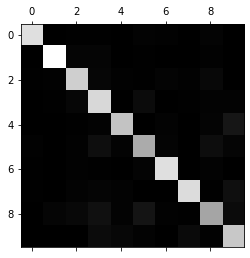

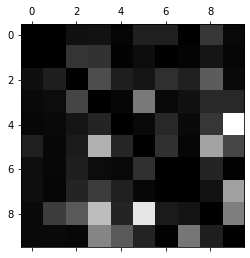

C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[[5686    0   34   13   12   57   46   16   46   13]
 [   1 6544   32   25    9   22    6   13   77   13]
 [  37   69 5307  116   69   29   88   68  149   26]
 [  21   26  149 5450    6  210   15   54  135   65]
 [  18   23   31   11 5412    9   62   21   45  210]
 [  66   18   50  199   61 4644  112   21  184   66]
 [  46   15   62    2   56   74 5624    6   29    4]
 [  16   25   63   36   58    7    2 5812   26  220]
 [  41  116   69  175   45  185   50   19 5077   74]
 [  27   26   15   80  161   34    4  173   58 5371]]


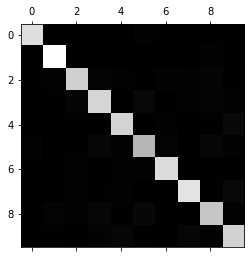

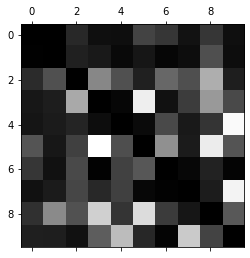

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
[[5840    1    8    2    4    9   20    1   35    3]
 [   1 6635   43   11   13    5    6   13   12    3]
 [  27   12 5749   30   32    4   20   37   41    6]
 [   7    7   91 5811    3   63    7   49   61   32]
 [  12   13   14    1 5645    0   28   14   17   98]
 [  20    9    9   64   12 5198   53    6   31   19]
 [  26   11    5    0   12   46 5803    0   15    0]
 [   4   24   58    6   37    1    0 6037   11   87]
 [   9   35   44   52   26   52

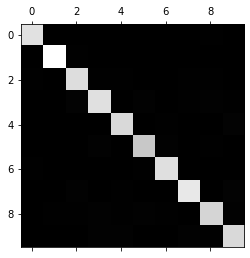

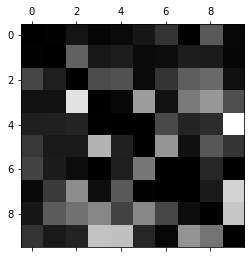

In [16]:
for model in range(0, len(trainedModels),1):
    y_train_pred = cross_val_predict(trainedModels[model], train_X, train_y, cv=3)
    print(trainedModels[model])
    conf_mx = (confusion_matrix(train_y, y_train_pred))
    print(conf_mx)
    
    # Darstellen der Confusion Matrix durch Farben (hier grauöne)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    plt.show()
    
    # Darstellen der Fehler in Grautönen (Ablesen welche Klassen zu welcher fehlklassifiziert werden und reverse, oder eben nicht)
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    np.fill_diagonal(norm_conf_mx, 0)
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
    plt.show()
   

# Interpreation CM Multiclass-Classification
Die CM sollte soweit klar sien
durch die "plt.matshow" kann ich gut erkennen welche Klasse wie gut klassifiziert wurde. Bspw. ist die 5 am dunkelsten => von den "5" wurde am meisten falsch klassifiziert